In [1]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size=(150, 150), 
                                                    batch_size=5,
                                                    class_mode='binary')

Found 160 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)
test_generator = test_datagen.flow_from_directory('data/test',
                                                    target_size=(150, 150), 
                                                    batch_size=5,
                                                    class_mode='binary')

Found 120 images belonging to 2 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
history = model.fit(train_generator, epochs=100,
                    validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 21s 620ms/step - loss: 0.7180 - accuracy: 0.4500 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 21s 646ms/step - loss: 0.6896 - accuracy: 0.5188 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 21s 672ms/step - loss: 0.6884 - accuracy: 0.5188 - val_loss: 0.6818 - val_accuracy: 0.5750
Epoch 4/100
32/32 [==============================] - 19s 586ms/step - loss: 0.6857 - accuracy: 0.5938 - val_loss: 0.6757 - val_accuracy: 0.5167
Epoch 5/100
32/32 [==============================] - 20s 617ms/step - loss: 0.6684 - accuracy: 0.5437 - val_loss: 0.6762 - val_accuracy: 0.6167
Epoch 6/100
32/32 [==============================] - 21s 664ms/step - loss: 0.6675 - accuracy: 0.6250 - val_loss: 0.6597 - val_accuracy: 0.5333
Epoch 7/100
32/32 [==============================] - 19s 589ms/step - loss: 0.6461 - accuracy: 0.6625 - val_loss: 0.6676 - val_accuracy:

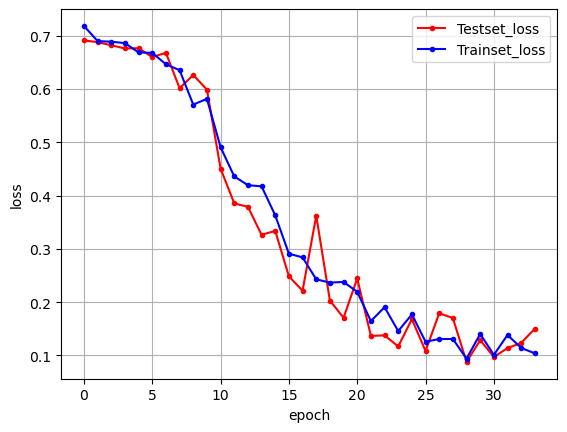

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()